In [6]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from pathlib import Path
import geopandas

In [5]:
DATA_PATH = Path("/Users/luis/projects/lyon_loyers/data")

In [7]:
gdf = geopandas.read_file(DATA_PATH / "car_care.carencadrmtloyer_latest.json")

In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   codeiris  233 non-null    object  
 1   zonage    233 non-null    object  
 2   valeurs   233 non-null    object  
 3   commune   233 non-null    object  
 4   insee     233 non-null    object  
 5   gid       233 non-null    object  
 6   geometry  233 non-null    geometry
dtypes: geometry(1), object(6)
memory usage: 12.9+ KB


In [12]:
gdf.codeiris.is_unique

True

In [20]:
gdf = pd.concat((gdf, pd.json_normalize(gdf.valeurs.values.tolist())),axis=1)

In [37]:
gdf.columns

Index(['codeiris', 'zonage', 'valeurs', 'commune', 'insee', 'gid', 'geometry',
       '1.1946-70.meuble.loyer_reference',
       '1.1946-70.meuble.majoration_unitaire',
       '1.1946-70.meuble.loyer_reference_majore',
       ...
       '4 et plus.avant 1946.non meuble.loyer_reference',
       '4 et plus.avant 1946.non meuble.loyer_referece_minore',
       '4 et plus.avant 1946.non meuble.loyer_reference_majore',
       '4 et plus.après 1990.meuble.loyer_reference',
       '4 et plus.après 1990.meuble.majoration_unitaire',
       '4 et plus.après 1990.meuble.loyer_reference_majore',
       '4 et plus.après 1990.meuble.loyer_reference_minore',
       '4 et plus.après 1990.non meuble.loyer_reference',
       '4 et plus.après 1990.non meuble.loyer_referece_minore',
       '4 et plus.après 1990.non meuble.loyer_reference_majore'],
      dtype='object', length=119)

In [39]:
gdf.loc[:,gdf.columns.str.match(r"1.+\.meuble\.loyer_reference$")].mean(axis=1)

0      17.225
1      17.225
2      17.225
3      17.075
4      17.225
        ...  
228    17.075
229    17.075
230    17.075
231    17.075
232    17.075
Length: 233, dtype: float64

In [44]:
gdf.loc[:,gdf.columns.str.match(r".+\.loyer_reference$")].mean(axis=1)

0      13.084375
1      13.084375
2      13.084375
3      12.634375
4      13.084375
         ...    
228    12.634375
229    12.634375
230    12.634375
231    12.634375
232    12.634375
Length: 233, dtype: float64

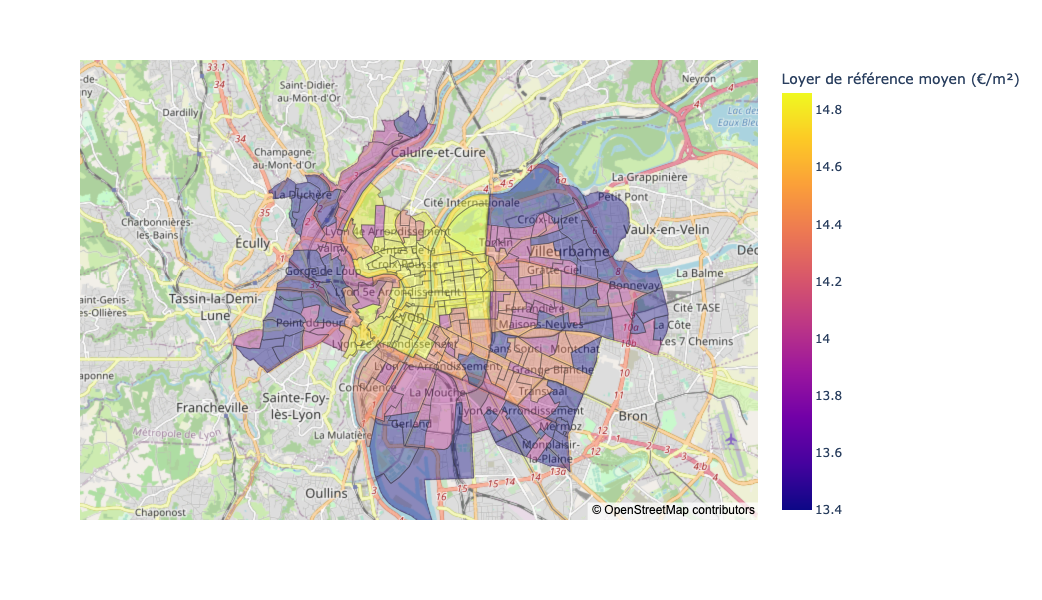

In [82]:
fig = px.choropleth_mapbox(gdf,
                           geojson=gdf.geometry,
                           locations=gdf.index,
                           color=gdf.loc[:,gdf.columns.str.match(r"3.+\.loyer_reference_majore$")].mean(axis=1).round(2),
                           center={"lat": 45.764043, "lon": 4.835659},
                           mapbox_style="open-street-map",
                           zoom=11, height=600,opacity=0.4,labels={'color':'Loyer de référence moyen (€/m²)'})
fig.show()